<a href="https://colab.research.google.com/github/anidec25/Neutral-Networks/blob/main/Understanding-ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the required library

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential


import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Loading the data

In [ ]:
df = pd.read_csv('https://bit.ly/kaggletrain')

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [ ]:
df_final = df[['Age','Fare','Survived']]

In [ ]:
X = df_final.iloc[:,:-1]
y = df_final.iloc[:,-1]

In [ ]:
print('X Shape:',X.shape)
print('y Shape:',y.shape)

X Shape: (183, 2)
y Shape: (183,)


In [ ]:
drop_cols = ['PassengerId','Name','Ticket','Cabin']

df_mod = df.drop(columns=drop_cols)

df_mod.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38.0,1,0,71.2833,C
3,1,1,female,35.0,1,0,53.1000,S
6,0,1,male,54.0,0,0,51.8625,S
10,1,3,female,4.0,1,1,16.7000,S
11,1,1,female,58.0,0,0,26.5500,S


In [ ]:
df_mod = pd.get_dummies(df_mod,columns=['Sex','Embarked'], drop_first=True)

In [ ]:
X = df_mod.iloc[:,1:]
y = df_mod.iloc[:,:1]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

print(X_train.shape)
print(X_test.shape)

(146, 8)
(37, 8)


In [ ]:
df_mod['Survived'].value_counts()

1    123
0     60
Name: Survived, dtype: int64

In [ ]:
df_mod

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
1,1,1,38.0,1,0,71.2833,0,0,0
3,1,1,35.0,1,0,53.1000,0,0,1
6,0,1,54.0,0,0,51.8625,1,0,1
10,1,3,4.0,1,1,16.7000,0,0,1
11,1,1,58.0,0,0,26.5500,0,0,1
...,...,...,...,...,...,...,...,...,...
871,1,1,47.0,1,1,52.5542,0,0,1
872,0,1,33.0,0,0,5.0000,1,0,1
879,1,1,56.0,0,1,83.1583,0,0,0
887,1,1,19.0,0,0,30.0000,0,0,1


In [ ]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
632,1,32.0,0,0,30.5000,1,0,0
700,1,18.0,1,0,227.5250,0,0,0
772,2,57.0,0,0,10.5000,0,0,1
712,1,48.0,1,0,52.0000,1,0,1
591,1,52.0,1,0,78.2667,0,0,0
...,...,...,...,...,...,...,...,...
647,1,56.0,0,0,35.5000,1,0,0
679,1,36.0,0,1,512.3292,1,0,0
345,2,24.0,0,0,13.0000,0,0,1
690,1,31.0,1,0,57.0000,1,0,1


## Scaling is required

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

## Model Development

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(8,activation='relu',input_dim = 8))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 4)                 20        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_scaled,y_train, epochs= 500, validation_split=0.2)

Epoch 1/500
4/4 [==============================] - 3s 139ms/step - loss: 0.6670 - accuracy: 0.6293 - val_loss: 0.6819 - val_accuracy: 0.4333
Epoch 2/500
4/4 [==============================] - 0s 26ms/step - loss: 0.6617 - accuracy: 0.6724 - val_loss: 0.6779 - val_accuracy: 0.4667
Epoch 3/500
4/4 [==============================] - 0s 24ms/step - loss: 0.6565 - accuracy: 0.6638 - val_loss: 0.6735 - val_accuracy: 0.4667
Epoch 4/500
4/4 [==============================] - 0s 23ms/step - loss: 0.6511 - accuracy: 0.6724 - val_loss: 0.6690 - val_accuracy: 0.4667
Epoch 5/500
4/4 [==============================] - 0s 44ms/step - loss: 0.6453 - accuracy: 0.6638 - val_loss: 0.6649 - val_accuracy: 0.5333
Epoch 6/500
4/4 [==============================] - 0s 20ms/step - loss: 0.6390 - accuracy: 0.6897 - val_loss: 0.6609 - val_accuracy: 0.5667
Epoch 7/500
4/4 [==============================] - 0s 16ms/step - loss: 0.6328 - accuracy: 0.7155 - val_loss: 0.6570 - val_accuracy: 0.6000
Epoch 8/500
4/4 [==

In [ ]:
model.layers[0].get_weights()

[array([[-0.49849793,  0.22957294, -0.38300523, -0.5113359 ,  0.30829167,
          0.3105747 , -0.31669158, -0.13884874],
        [-0.40309173, -0.00219126, -0.46530178, -0.45041507,  0.3934708 ,
          0.18870176,  0.2165804 , -0.59757787],
        [-0.04391126,  0.8668275 , -0.57267475, -0.3657094 ,  0.62030065,
         -0.3858277 ,  0.6296251 ,  0.17305173],
        [-0.3853766 ,  0.63170075, -0.39174858, -0.28581458, -0.18815483,
         -0.4912981 , -0.73806185,  0.7468049 ],
        [-0.4978036 , -0.22495246,  0.31548837, -0.13949795, -0.03318964,
         -0.2340138 ,  1.105985  , -0.6372084 ],
        [ 0.46569794,  0.88897806,  0.0196618 , -0.8888757 , -0.33387527,
         -0.20984912, -0.39981946, -0.18949145],
        [-0.60213   , -0.04657996,  0.16327356, -0.5850966 , -0.3052357 ,
         -0.2786507 ,  0.46884936, -0.02611298],
        [-0.02607962, -0.25954047,  0.4132993 , -0.3931603 , -0.18819623,
         -0.39801404,  0.40050685,  0.32507056]], dtype=float32),

In [ ]:
model.layers[1].get_weights()

[array([[-0.42481664,  0.2652135 , -0.5987764 , -0.39957774],
        [-0.22797014,  0.74628264,  0.1309523 , -0.6862666 ],
        [-0.20197138, -0.07085716,  0.5117806 ,  0.8380666 ],
        [-0.02322262, -0.26415083, -1.1186926 ,  0.67913586],
        [-0.54523623,  1.0233718 , -0.44606915,  0.42961353],
        [ 0.2635163 , -0.35595974,  0.88159126,  0.34432694],
        [ 0.06003041, -0.27440998,  0.31475908,  0.7832436 ],
        [-0.6610883 ,  0.5723419 , -0.87160933, -0.26535553]],
       dtype=float32),
 array([-0.18694717, -0.13094935,  0.22087407,  0.12490666], dtype=float32)]

## Loss History plot

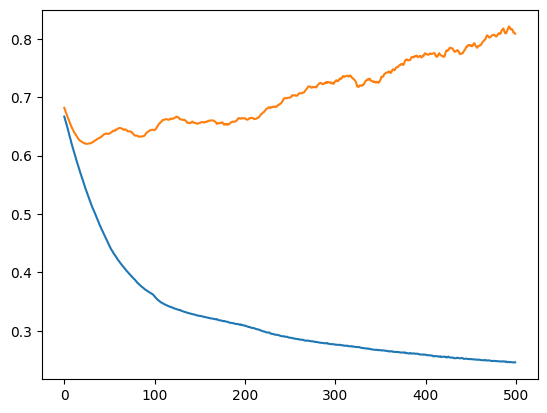

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

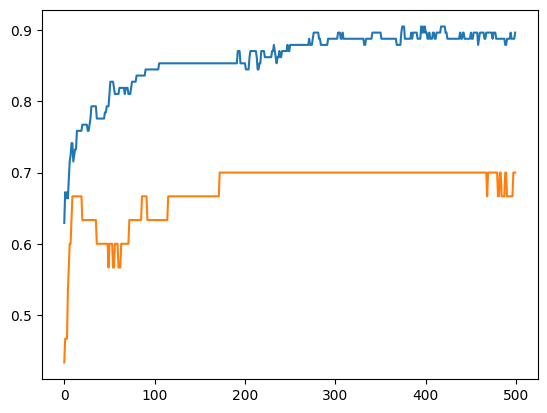

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])